# DEMO 1.1: **REGRESSION**
<u>Nội dung</u>:
1. Multiple Linear Regression
2. Simple Linear Regresssion

<u>Cập nhật</u>: **07/2025**




---
### **MÔI TRƯỜNG TRIỂN KHAI ỨNG DỤNG**
---

In [1]:
## Kết nối Google Drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

folder = '/content/gdrive/My Drive/Edu/1. UEH/Machine Learning/Demo/Ch1'

Mounted at /content/gdrive


In [2]:
## Thư viện
import matplotlib.pyplot   as plt
import numpy               as np
import pandas              as pd
import seaborn             as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model  import LinearRegression

---
## 1a. **Multiple Linear Regression - (heights, weights)**
Cho các tập tin dữ liệu về chiều cao (heights.txt) và cân nặng (weights.txt)
- Tạo 2 arrays: heights và weights để lưu trữ 2 tập tin dữ liệu trên.
- Biểu diễn trực quan dữ liệu heights, weights
- Xây dựng mô hình hồi quy tuyến tính theo phương pháp Gradient Descent
---

In [3]:
## Đọc tập tin chiều cao heights.txt vào array 'heights' và chuyển đổi đơn vị (mét)
f    = open(folder + '/Data/heights.txt')
data = f.read()
f.close()

heights = np.array(eval(data)) * 0.0254
print('heights[] có', heights.size, 'mẫu;', heights[0:5], '(mét)')

heights[] có 1015 mẫu; [1.8796 1.8796 1.8288 1.8288 1.8542] (mét)


In [18]:
## Đọc tập tin cân nặng weights.txt vào array 'weights' và chuyển đổi đơn vị (kg)
f    = open(folder + '/Data/weights.txt')
data = f.read()
f.close()

weights = np.array(eval(data)) * 0.453592
print('weights[] có', weights.size, 'mẫu;', weights[0:5], '(kg)')

weights[] có 1015 mẫu; [81.64656  97.52228  95.25432  95.25432  85.275296] (kg)


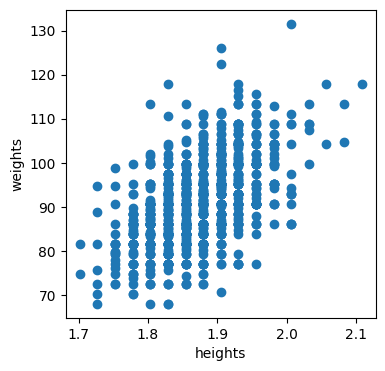

In [19]:
## Biểu diễn trực quan dữ liệu
plt.figure(figsize = (4, 4))
plt.xlabel('heights')
plt.ylabel('weights')
plt.scatter(x = heights, y = weights)
plt.show()

In [20]:
## Mức độ tương quan (Pearson correlation) giữa heights và weights
np.corrcoef(heights, weights)

array([[1.        , 0.53153932],
       [0.53153932, 1.        ]])

In [21]:
## Mô hình hóa dữ liệu
##    Lưu ý: Thêm 1 vào cột đầu tiên của X để có cùng số chiều với vector tham số (m, b)
X    = heights
xHat = np.c_[np.ones(heights.size), X]
y    = weights
print(xHat)

[[1.     1.8796]
 [1.     1.8796]
 [1.     1.8288]
 ...
 [1.     1.905 ]
 [1.     1.905 ]
 [1.     1.8542]]


In [22]:
##------------------------------------------------------------------------------
## Hàm thực hiện Gradient Descent (Tính đạo hàm bằng cách nhân ma trận)
##------------------------------------------------------------------------------
def gradient_descent(rho, xHat, y, numIterations):
    #     rho:  learning rate
    #     xHat: ma trận input  [[1 x0],[1 x1], [1  x2], ...]
    #     y:    vector  output [y0, y1, y2, ...]
    #     numIterations: số vòng lặp

    # Kích thước tập huấn luyện
    N = xHat.shape[0]

    # Khởi tạo (tùy ý) vector tham số cần xác định: w = (b, m) = [1, 1]
    w = np.ones(2)

    # Tìm cực tiểu địa phương của loss fuction (di chuyển dần dần ngược dấu đạo hàm)
    for iter in range(0, numIterations):
        yHat = (xHat @ w)
        loss = (yHat - y)

        # Đạo hàm của hàm L (riêng phần theo w[0] và w[1])
        gradient = (xHat.T @ loss) / N

        # Di chuyển ngược dấu đạo hàm đến điểm mới
        w = w - rho * gradient
    return w

In [23]:
## Áp dụng Gradient Descent để xác định w = (b, m)
rho = 0.0001
w   = gradient_descent(rho, xHat, y, 10000)
print(w)

[20.36136694 37.43114905]


In [24]:
## Phương trình đường thẳng (không gian 2D): y = m.x + b
weights_predict = w[1] * X + w[0]
print('Phương trình hồi quy tuyến tính:')
print('   weight = (', w[1], ') * height + (', w[0], ')')

Phương trình hồi quy tuyến tính:
   weight = ( 37.431149051115916 ) * height + ( 20.36136693804935 )


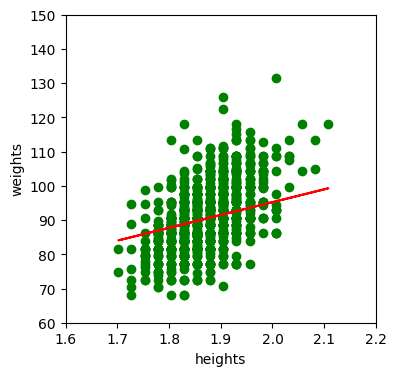

In [25]:
## Biểu diễn trực quan kết quả của Gradient Descent
plt.figure(figsize = (4, 4))
plt.xlim(1.6, 2.2)
plt.ylim(60, 150)
plt.scatter(xHat[:, 1], weights, color = "green")
plt.plot(X, weights_predict, color = 'red')
plt.xlabel("heights")
plt.ylabel("weights")
plt.show()

In [26]:
## Sử dụng thư viện sklearn với X có kiểu np.array
regr = LinearRegression(fit_intercept = False) # fit_intercept = False ---> Tính toán bias
regr.fit(xHat, y) # huấn luyện mô hình
regr.coef_

array([-68.55285156,  85.42051044])

In [27]:
## Phương trình đường thẳng (không gian 2D): y = m.x + b
slope = regr.coef_.flatten()[1]
bias  = regr.coef_.flatten()[0]

weights_predict_sklearn = slope * X + bias

print('Phương trình hồi quy tuyến tính:')
print('   weight = (', slope, ') * height + (', bias, ')')

Phương trình hồi quy tuyến tính:
   weight = ( 85.42051043674155 ) * height + ( -68.55285156270799 )


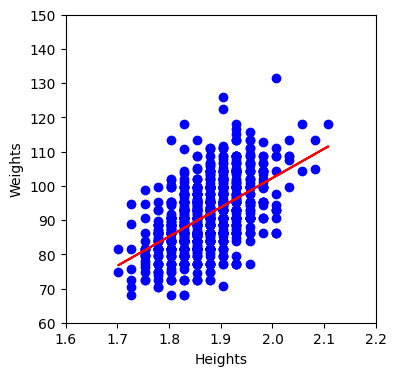

In [28]:
## Biểu diễn trực quan kết quả của hàm sklearn
plt.figure(figsize = (4, 4))
plt.xlim(1.6, 2.2)
plt.ylim(60, 150)
plt.scatter(xHat[:, 1], weights, color = "blue")
plt.plot(X, weights_predict_sklearn, color = 'red')
plt.xlabel("Heights")
plt.ylabel("Weights")
plt.show()

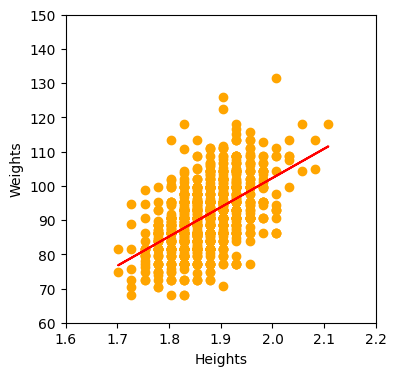

In [29]:
## Sử dụng regr.predict(X).predict() thay vì áp dụng công thức hồi quy
plt.figure(figsize = (4, 4))
plt.xlim(1.6, 2.2)
plt.ylim(60, 150)
plt.scatter(xHat[:, 1], weights, color = 'orange')
plt.plot(X, regr.predict(xHat), color = 'red')
plt.xlabel("Heights")
plt.ylabel("Weights")
plt.show()

In [30]:
## Sử dụng thư viện sklearn với X có kiểu dataframe
model = LinearRegression()

## Huấn luyện mô hình
model.fit(X = pd.DataFrame(X), y = y)

LinearRegression()

In [31]:
## Phương trình đường thẳng (không gian 2D): y = m.x + b
slope = model.coef_[0]
bias  = model.intercept_

print('Phương trình hồi quy tuyến tính:')
print('   weight = (', slope, ') * height + (', bias, ')')

Phương trình hồi quy tuyến tính:
   weight = ( 85.42051043674161 ) * height + ( -68.55285156270801 )


In [32]:
## Phương pháp dựa trên ma trận giả nghịch đảo
A = (xHat.T @ xHat)
b = (xHat.T @ y)

## Vector tham số
w = np.linalg.pinv(A) @ b

slope3 = w[1]
bias3  = w[0]

print('Phương trình hồi quy tuyến tính:')
print('   weight = (', slope3, ') * height + (', bias3, ')')

Phương trình hồi quy tuyến tính:
   weight = ( 85.42051043666294 ) * height + ( -68.55285156256211 )


---
## 1b. **Multiple Linear Regression - (mtcars.csv)**
---

In [33]:
## Mở tập tin dữ liệu
data = pd.read_csv(folder + '/Data/mtcars.csv')
print(data.head())

          Unnamed: 0   mpg   disp   hp     wt
0          Mazda RX4  21.0  160.0  110  2.620
1      Mazda RX4 Wag  21.0  160.0  110  2.875
2         Datsun 710  22.8  108.0   93  2.320
3     Hornet 4 Drive  21.4  258.0  110  3.215
4  Hornet Sportabout  18.7  360.0  175  3.440


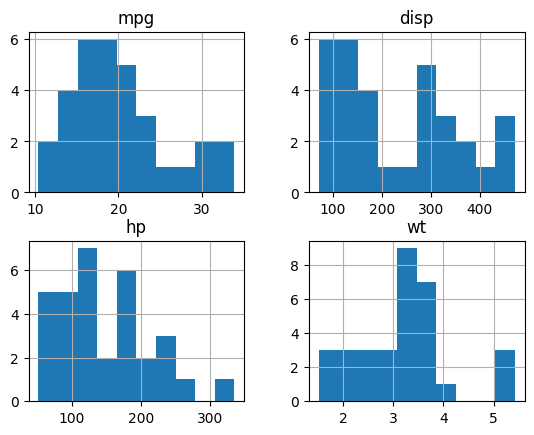

In [34]:
## Quan sát dữ liệu
data.hist()
plt.show()

In [35]:
## Mô hình hóa đa biến
model = LinearRegression()

## Huấn luyện mô hình
model.fit(X = data.loc[:, ['wt', 'hp','disp']], y = data['mpg'])

LinearRegression()

In [36]:
## Hiển thị kết quả các tham số:
print('Intercept w_0 =', model.intercept_)
print('          w_i =', model.coef_)

Intercept w_0 = 37.10550526903184
          w_i = [-3.80089058e+00 -3.11565508e-02 -9.37009081e-04]


---
## 2. **Simple Linear Regression**
---

In [37]:
## Công thức hiệp phương sai
mean_x  = np.mean(heights)
delta_x = (heights - mean_x).flatten()

mean_y  = np.mean(weights)
delta_y = (weights - mean_y).flatten()

numerator   = delta_x @ delta_y.T
denominator = delta_x @ delta_x.T

## Vector tham số
slope4  = numerator/denominator
bias4   = mean_y - (slope4 * mean_x)

print('Phương trình hồi quy tuyến tính:')
print('   weight = (', slope4, ') * height + (', bias4, ')\n')

Phương trình hồi quy tuyến tính:
   weight = ( 85.42051043674162 ) * height + ( -68.55285156270804 )

